In [2]:
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

data = pd.read_csv("../input/NYC_Wi-Fi_Hotspot_Locations.csv")
data.head()

OBJECTID Borough  Type              Provider          Name  \
0       998      MN  Free  LinkNYC - Citybridge  mn-05-123662   
1       999      MN  Free  LinkNYC - Citybridge  mn-05-123789   
2      1000      MN  Free  LinkNYC - Citybridge  mn-05-133354   
3      1001      MN  Free  LinkNYC - Citybridge  mn-05-133359   
4      1002      MN  Free  LinkNYC - Citybridge  mn-05-133361   

             Location   Latitude  Longitude              X              Y  \
0  179 WEST 26 STREET  40.745968 -73.994039  985901.695307  211053.130644   
1   25 EAST 29 STREET  40.744614 -73.985069  988387.309473  210559.946684   
2       1515 BROADWAY  40.757666 -73.985878  988162.256449  215315.021263   
3  201 WEST 48 STREET  40.759971 -73.984342  988587.757617  216155.033448   
4       1600 Broadway  40.760413 -73.984541  988532.655360  216316.036881   

                      ...                                     NTAName  \
0                     ...                       Midtown-Midtown South   
1                     ...                       Midtown-Midtown South   
2                     ...                       Midtown-Midtown South   
3                     ...                       Midtown-Midtown South   
4                     ...                       Midtown-Midtown South   

  CounDist Postcode BoroCD CT2010 BCTCB2010      BIN         BBL DOITT_ID  \
0        3    10001    105     95   1009500        0           0     1425   
1        2    10016    105     74   1007400  1016929  1008590024     1426   
2        3    10036    105    119   1011900  1024714  1010160036     1427   
3        4    10036    105    125   1012500  1076195  1010200046     1428   
4        4    10019    105    125   1012500  1087187  1010207502     1429   

                          Location (Lat, Long)  
0  New York\n(40.74596800000, -73.99403900000)  
1  New York\n(40.74461400000, -73.98506900000)  
2  New York\n(40.75766600000, -73.98587800000)  
3  New York\n(40.75997100000, -73.98434200000)  
4  New York\n(40.76041300000, -73.98454100000)  

[5 rows x 29 columns]

Looking at the Neighborhood Tabular Areas (a type of neighborhood area designation used by the City of New York) assigned to the various WiFi nodes, we see that far and away the most "popular" areas for putting up a hotspot are in Manhattan.

In [3]:
data['NTAName'].value_counts()

Midtown-Midtown South                               138
DUMBO-Vinegar Hill-Downtown Brooklyn-Boerum Hill    119
Hudson Yards-Chelsea-Flatiron-Union Square          104
Central Harlem North-Polo Grounds                    99
Central Harlem South                                 80
Upper West Side                                      77
East Harlem North                                    62
Turtle Bay-East Midtown                              58
Battery Park City-Lower Manhattan                    48
Hamilton Heights                                     47
East Village                                         47
Fort Greene                                          45
Lincoln Square                                       44
Murray Hill-Kips Bay                                 42
Upper East Side-Carnegie Hill                        41
West Village                                         39
Crown Heights North                                  38
Hunters Point-Sunnyside-West Maspeth            

A tabulation by borough shows this even more clearly:

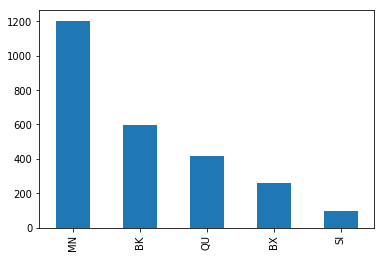

In [4]:
data['Borough'].value_counts().plot.bar()

We can get a better feel for what the distribution is with a quick map:

In [5]:
import folium
display = folium.Map(location=[40.75, -74])

for (_, (lat, long)) in data[['Latitude', 'Longitude']].iterrows():
    folium.CircleMarker([lat, long],
                    radius=5,
                    color='#3186cc',
                    fill_color='#3186cc',
                   ).add_to(display)

display

The WiFi hotspots are (logically) concentrated alongside certain arterial roadways. What stands out is how strong that effect is. 3rd Avenue and 8th Avenue in Manhattan both "stand out" in terms of their WiFi offerings, as do certain other roadways, like Queens Boulevard.

What happens when we try to cluster?

In [6]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=8, random_state=0).fit(data[['Latitude', 'Longitude']].values)
labels = kmeans.labels_

colors = ['#d53e4f','#f46d43','#fdae61','#fee08b','#e6f598','#abdda4','#66c2a5','#3288bd']
display = folium.Map(location=[40.75, -74])

for (lat, long, label) in zip(data['Latitude'], data['Longitude'], labels):
    folium.CircleMarker([lat, long],
                    radius=5,
                    color=colors[label],
                    fill_color=colors[label],
                   ).add_to(display)
    
display

Interestingly enough, KMeans clustering (a decent default) doesn't stop on the borough boundaries quite like I thought it would, instead pushing into "uptownsy" (and popular!) parts of Brooklyn and Queens close to Manhattan as well. This is evidence that unlike certain other projects, public WiFi "pushes out" past Manhattan and into the outer boroughs as well, at least a little.

The vast majority of nodes in New York City are provided by the same entity, LinkNYC:

In [7]:
data['Provider'].value_counts()

LinkNYC - Citybridge       1134
SPECTRUM                    343
Transit Wireless            276
ALTICEUSA                   237
Harlem                      128
Downtown Brooklyn           100
NYPL                         90
QPL                          65
BPL                          59
Manhattan Down Alliance      36
Chelsea                      30
NYCHA                        28
AT&T                         27
City Tech                    11
Partner                       2
Name: Provider, dtype: int64

It turns out that LinkNYC is also responsible for much of the street-structuring of the data!

In [8]:
from sklearn.cluster import KMeans
selection = data[data['Provider'] == 'LinkNYC - Citybridge']
kmeans = KMeans(n_clusters=5, random_state=0).fit(selection[['Latitude', 'Longitude']].values)
labels = kmeans.labels_

colors = ['#d7191c','#fdae61','#ffffbf','#abdda4','#2b83ba']
display = folium.Map(location=[40.75, -74])


for (lat, long, label) in zip(selection['Latitude'], selection['Longitude'], labels):
    folium.CircleMarker([lat, long],
                    radius=5,
                    color=colors[label],
                    fill_color=colors[label],
                   ).add_to(display)
    
display